In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import KFold

In [2]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
# print(cars)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
# print(cars['horsepower'].unique())
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')
print(filtered_cars['horsepower'].unique())

[130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193. 100. 105. 175. 153. 180. 110.
  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92. 145.
 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.  52.
  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152. 102.
 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138. 135.
 142.  77.  62. 132.  84.  64.  74. 116.  82.]


In [3]:
def train_and_test(cols):
    # Split the dataframe into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    #Calculate the mean_squared_error using the predicted values for the mpg
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    #Calculate the variance using the predicted values for the mpg
    variance = np.var(predictions)
    return(mse, variance)
    
cyl_mse, cyl_var = train_and_test(["cylinders"])
weight_mse, weight_var = train_and_test(["weight"])
print("Using the cylinders column, the mse is: {}".format(cyl_mse))
print("Using the cylinders column, the variance is: {}".format(cyl_var))
print("Using the weight column, the mse is: {}".format(weight_mse))
print("Using the weight column, the variance is: {}".format(weight_var))

Using the cylinders column, the mse is: 24.02017956815553
Using the cylinders column, the variance is: 36.74255887416017
Using the weight column, the mse is: 18.6766165974193
Using the weight column, the variance is: 42.08612184489639


In [4]:
# Our implementation for train_and_test, takes in a list of strings.
def train_and_test(cols):
    # Split into features & target.
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    # Fit model.
    lr = LinearRegression()
    lr.fit(features, target)
    # Make predictions on training set.
    predictions = lr.predict(features)
    # Compute MSE and Variance.
    mse = mean_squared_error(filtered_cars["mpg"], predictions)
    variance = np.var(predictions)
    return(mse, variance)

columns = ["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"]

calculations = {}

for i in range(1,len(columns)+1):
    print(columns[:i])
    mse, var = train_and_test(columns[:i])
    calculations[i] = (mse,var)
print(calculations.keys())
print(calculations.values())
print(calculations)

['cylinders']
['cylinders', 'displacement']
['cylinders', 'displacement', 'horsepower']
['cylinders', 'displacement', 'horsepower', 'weight']
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year']
['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']
dict_keys([1, 2, 3, 4, 5, 6, 7])
dict_values([(24.02017956815553, 36.74255887416017), (21.282057055586364, 39.48068138672933), (20.25295483971423, 40.50978360260148), (17.76386057184385, 42.99887787047179), (17.761396105406217, 43.00134233690938), (11.59017098141523, 49.172567460900495), (10.847480945000449, 49.91525749731518)])
{1: (24.02017956815553, 36.74255887416017), 2: (21.282057055586364, 39.48068138672933), 3: (20.25295483971423, 40.50978360260148), 4: (17.76386057184385, 42.99887787047179), 5: (17.761396105406217, 43.00134233690938), 6: (11.59017098141523, 49.172567460900495), 7: (10.8474809450

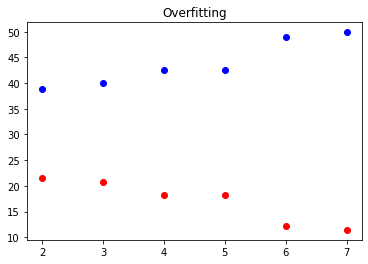

In [6]:
import pandas as pd
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]
cars = pd.read_table("auto-mpg.data", delim_whitespace=True, names=columns)
filtered_cars = cars[cars['horsepower'] != '?'].copy()
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype('float')

def train_and_cross_val(cols):
    features = filtered_cars[cols]
    target = filtered_cars["mpg"]
    
    variance_values = []
    mse_values = []
    
    # KFold instance.
    kf = KFold(n_splits=10, shuffle=True, random_state=3)
    
    # Iterate through over each fold.
    for train_index, test_index in kf.split(features):
        # Training and test sets.
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        
        # Fit the model and make predictions.
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        predictions = lr.predict(X_test)
        
        # Calculate mse and variance values for this fold.
        mse = mean_squared_error(y_test, predictions)
        var = np.var(predictions)

        # Append to arrays to do calculate overall average mse and variance values.
        variance_values.append(var)
        mse_values.append(mse)
   
    # Compute average mse and variance values.
    avg_mse = np.mean(mse_values)
    avg_var = np.mean(variance_values)
    return(avg_mse, avg_var)
# We've hidden the `train_and_cross_val` function to save space but you can still call the function!
import matplotlib.pyplot as plt
   
    


columns = ["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"]

mse = []
var = []

for i in range(2,len(columns)+1):
    msef, varf = train_and_cross_val(columns[:i])
    mse.append(msef)
    var.append(varf)

two_mse, two_var = train_and_cross_val(["cylinders", "displacement"])
three_mse, three_var = train_and_cross_val(["cylinders", "displacement", "horsepower"])
four_mse, four_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight"])
five_mse, five_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration"])
six_mse, six_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year"])
seven_mse, seven_var = train_and_cross_val(["cylinders", "displacement", "horsepower", "weight", "acceleration","model year", "origin"])

def draw_overfitting(mse,var,x):
    #Linear regression 
    y = mse
    plt.scatter(x,y,c="red")    
    #Scatter plot
    y = var
    plt.scatter(x,y,c="blue")
    plt.title("Overfitting")
    plt.show()
    
#We see the line of best fit on the scatter plot
draw_overfitting(mse,var,range(2,len(columns)+1))